<a href="https://colab.research.google.com/github/shaloy-lewis/cardiovascular_risk_prediction/blob/main/Cardiovascular_Risk_Prediction_Shaloy_Lewis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u>**Project Title : Cardiovascular Risk Prediction**

##**Problem Description**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information.

Variables: Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.


## **Data Description**

Demographic:
* Sex: male or female ("M" or "F")
* Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* Education: The level of education of the patient (categorical values - 1,2,3,4)

Behavioral:
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical (history):
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

Medical (current):
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

Predict variable (desired target):
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

# **Importing the libraries and the dataset:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [ ]:
# Importing data
path = '/content/drive/MyDrive/Cardiovascular Risk Prediction - Shaloy Lewis/cardiovascular_risk.csv'

df = pd.read_csv(path,index_col='id')

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
df.shape

(3390, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


# **Data Cleaning:**

In [ ]:
# Renaming the columns
df.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [ ]:
df.head()

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Defining 3 lists containing the column names of 
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables

dependent_var = ['ten_year_chd']
continuous_var = ['age','cigs_per_day','total_cholesterol','systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','bp_meds','prevalent_stroke', 'prevalent_hyp', 'diabetes']

In [ ]:
# Encoding the binary columns

df['sex'] = np.where(df['sex'] == 'M',1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   int64  
 1   education          3303 non-null   float64
 2   sex                3390 non-null   int64  
 3   is_smoking         3390 non-null   int64  
 4   cigs_per_day       3368 non-null   float64
 5   bp_meds            3346 non-null   float64
 6   prevalent_stroke   3390 non-null   int64  
 7   prevalent_hyp      3390 non-null   int64  
 8   diabetes           3390 non-null   int64  
 9   total_cholesterol  3352 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3376 non-null   float64
 13  heart_rate         3389 non-null   float64
 14  glucose            3086 non-null   float64
 15  ten_year_chd       3390 non-null   int64  
dtypes: float64(9), int64(7)


In [ ]:
df.describe()

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
count,3390.000000,3303.000000,3390.000000,3390.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,0.432743,0.497640,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,0.495529,0.500068,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


# **Handling missing data:**

In [ ]:
# checking for null values
df.isna().sum()

age                    0
education             87
sex                    0
is_smoking             0
cigs_per_day          22
bp_meds               44
prevalent_stroke       0
prevalent_hyp          0
diabetes               0
total_cholesterol     38
systolic_bp            0
diastolic_bp           0
bmi                   14
heart_rate             1
glucose              304
ten_year_chd           0
dtype: int64

In [ ]:
# total null values
df.isna().sum().sum()

510

There are a total of 510 missing values in the dataset.

**1. Replacing the missing values in the categorical columns with the most frequent entry: bold text**

In [ ]:
# Replacing the missing values in the categorical columns with its mode
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['bp_meds'] = df['bp_meds'].fillna(df['bp_meds'].mode()[0])

In [ ]:
df.education.value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [ ]:
df.bp_meds.value_counts()

0.0    3290
1.0     100
Name: bp_meds, dtype: int64

**2. cigs_per_day:**

In [ ]:
# Mean and median of cigarettes per day
df.cigs_per_day.mean().round(0),df.cigs_per_day.median()

(9.0, 0.0)

In [ ]:
# All missing values in the cigs_per_day column
df[df['cigs_per_day'].isna()]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
422,55,1.0,0,1,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,1,1,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,1,1,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,0,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,1,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,0,1,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,0,1,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0


From the above table, we find that for every instance of missing values in cigs per day, the patients reported that they smoke.

Let's check the mean and median number of cigarettes smoked by patients, who reported that they smoke.

In [ ]:
# mean and median cigarettes per day for a smoker
df[df['is_smoking']==1]['cigs_per_day'].mean(),df[df['is_smoking']==1]['cigs_per_day'].median()

(18.345945945945946, 20.0)

* Mean number of cigarettes for a smoker = 18.34
* Median number of cigarettes for a smoker = 20

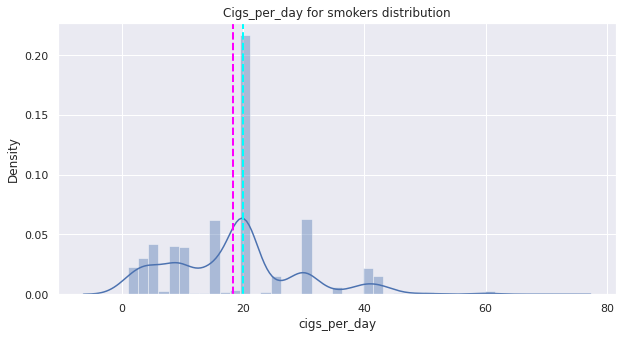

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df[df['is_smoking']==1]['cigs_per_day'])
plt.axvline(df[df['is_smoking']==1]['cigs_per_day'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[df['is_smoking']==1]['cigs_per_day'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Cigs_per_day for smokers distribution')
plt.show()

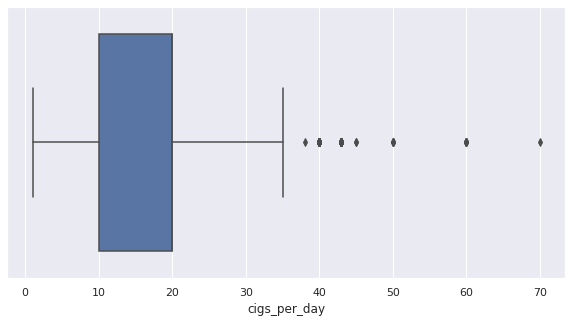

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(df[df['is_smoking']==1]['cigs_per_day'])

Since the number of cigarettes smoked by the patients who smoke contains outliers, the missing values in ths cigs_per_day column can be imputed with its median value.

In [ ]:
# Imputing the missing values in the cigs_per_day 
df['cigs_per_day'] = df['cigs_per_day'].fillna(df[df['is_smoking']==1]['cigs_per_day'].median())

In [ ]:
# Checking for any wrong entries where the patient is not a smoker
# and cigarettes per day above 0

df[(df['is_smoking']==0) & (df['cigs_per_day']>0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


In [ ]:
# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

df[(df['is_smoking']==1) & (df['cigs_per_day']==0)]

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


There are no errors in these columns.

**3. total_cholestrol, bmi, heart_rate:**

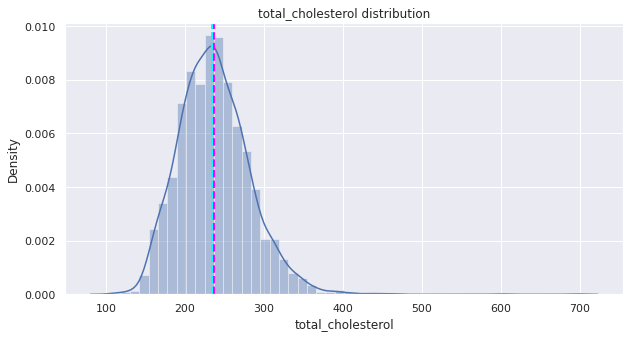

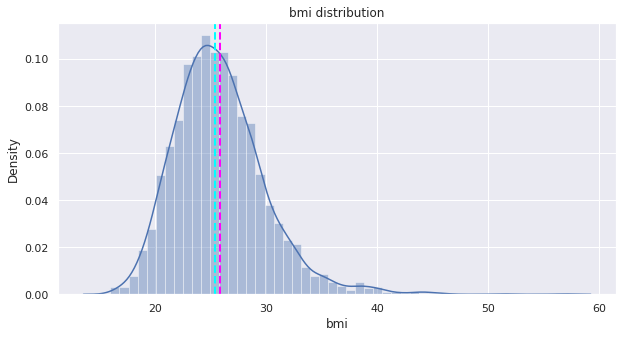

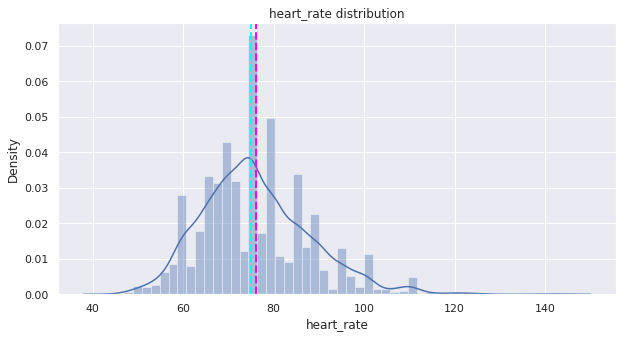

In [ ]:
# Checking the distribution of the total_cholesterol, bmi, and heart_rate
for i in ['total_cholesterol','bmi','heart_rate']:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])
  plt.axvline(df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[i].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(i+' distribution')
  plt.show()

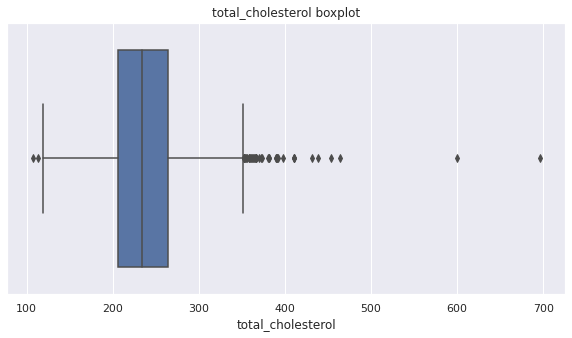

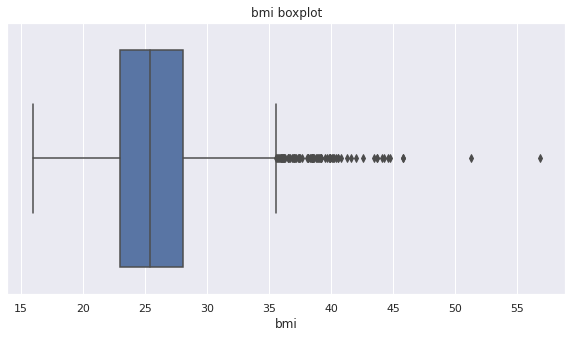

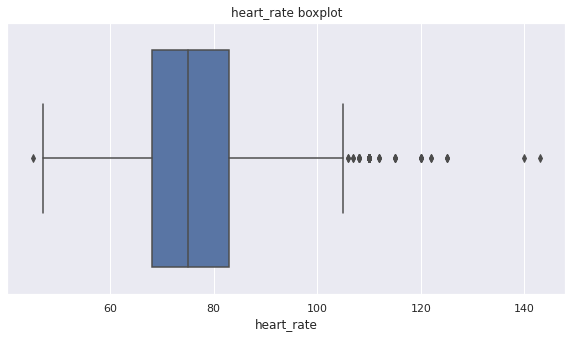

In [ ]:
# Checking outliers in total_cholesterol, bmi, heart_rate columns
for i in ['total_cholesterol','bmi','heart_rate']:
  plt.figure(figsize=(10,5))
  sns.boxplot(df[i])
  plt.title(i+' boxplot')
  plt.show()

In [ ]:
# Mean and median for total_cholesterol
df.total_cholesterol.mean(),df.total_cholesterol.median()

(237.07428400954655, 234.0)

In [ ]:
# Mean and median for bmi
df.bmi.mean(),df.bmi.median()

(25.7949644549763, 25.38)

In [ ]:
# Mean and median for heart_rate
df.heart_rate.mean(),df.heart_rate.median()

(75.97727943346119, 75.0)

Since the total_cholestrol, bmi, and heart_rate columns are positively skewed, and also contains outliers. We can impute the missing values with its median.

In [ ]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
df['total_cholesterol'] = df['total_cholesterol'].fillna(df['total_cholesterol'].median())
df['bmi'] = df['bmi'].fillna(df['bmi'].median())
df['heart_rate'] = df['heart_rate'].fillna(df['heart_rate'].median())

In [ ]:
# mean and median of total_cholesterol after median imputation
df.total_cholesterol.mean(),df.total_cholesterol.median()

(237.03982300884957, 234.0)

In [ ]:
# mean and median of bmi after median imputation
df.bmi.mean(),df.bmi.median()

(25.793250737463126, 25.38)

In [ ]:
# mean and median of heart_rate after median imputation
df.heart_rate.mean(),df.heart_rate.median()

(75.97699115044247, 75.0)

**4. glucose:**

In [ ]:
# total missing values in glucose
df.glucose.isna().sum()

304

The glucose column contains 304 missing values.

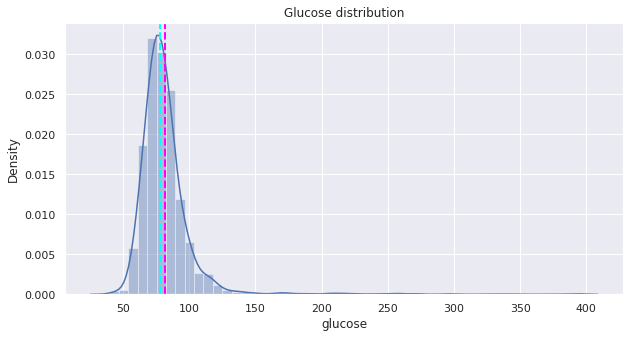

In [ ]:
# distribution of glucose
plt.figure(figsize=(10,5))
sns.distplot(df['glucose'])
plt.axvline(df['glucose'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['glucose'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Glucose distribution')
plt.show()

Text(0.5, 1.0, 'Glucose boxplot')

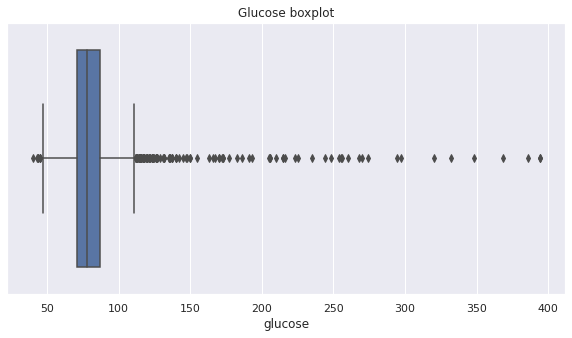

In [ ]:
# Outliers in glucose
plt.figure(figsize=(10,5))
sns.boxplot(df['glucose'])
plt.title('Glucose boxplot')

In [ ]:
# Mean, median, and mode for glucose
df.glucose.mean(),df.glucose.median(),df.glucose.mode()

(82.08651976668827, 78.0, 0    75.0
 dtype: float64)

* The distribution is positively skewed, with outliers.
* There are 304 missing values in the glucose column. If we choose to impute them with a single value of mean / median, we will be adding high bias at that point.
* To avoid this we can impute the missing values using KNN imputer.
* If the dataset in question had been a time series, we could have used the interpolation method to impute the missing values.

In [ ]:
# Using KNN imputer with K=10
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)

In [ ]:
# mean, median, and mode for glucose after knn imputation
df.glucose.mean(),df.glucose.median(),df.glucose.mode()

(82.04327433628319, 78.0, 0    75.0
 dtype: float64)

After KNN imputation, there is no massive change in the values of mean, and the values of median and mode remain the same.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   float64
 2   sex                3390 non-null   float64
 3   is_smoking         3390 non-null   float64
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   float64
 7   prevalent_hyp      3390 non-null   float64
 8   diabetes           3390 non-null   float64
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   float64
dtypes: float64(16)
memory us

The KNN imputer has converted all the columns to the float64 datatype. Hence, changing the column datatype accordingly as per the kind of data stored in the respective column.

In [ ]:
# changing datatypes
df = df.astype({'age': int, 'education':int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [ ]:
# checking for missing values
df.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

We have successfully handled all the missing values in the dataset.

# **Exploratory Data Analysis:**

In [ ]:
df.describe()

,age,education,sex,is_smoking,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,bmi,heart_rate,glucose,ten_year_chd
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,49.542183,1.946018,0.432743,0.497640,9.140413,0.029499,0.006490,0.315339,0.025664,237.039823,132.60118,82.883038,25.793251,75.976991,82.043274,0.150737
std,8.592878,1.017568,0.495529,0.500068,11.872952,0.169224,0.080309,0.464719,0.158153,44.994205,22.29203,12.023581,4.107026,11.970114,23.236590,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,27.997500,83.000000,86.000000,0.000000
max,70.000000,4.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


**Distribution of the dependent variable:**

Text(0.5, 1.0, 'ten_year_chd distribution')

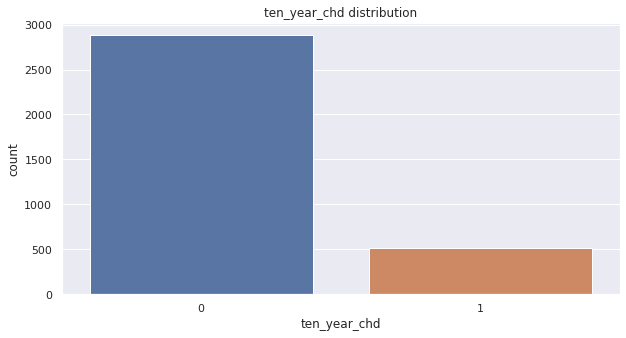

In [ ]:
# Distribution of dependent varaible - ten_year_chd
plt.figure(figsize=(10,5))
sns.countplot(df[dependent_var[0]])
plt.xlabel(dependent_var[0])
plt.title(dependent_var[0]+' distribution')

In [ ]:
# Distribution of dependent variable
df[dependent_var].value_counts()

ten_year_chd
0               2879
1                511
dtype: int64

In [ ]:
# unbalanced distribution
511/(2879+511)

0.15073746312684366

The dependent variable - 10-year risk of coronary heart disease is unbalanced. Only ~15% of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.

The dependent variables are unbalanced. This must be taken into consideration during the model building, and evaluation phase.

**Analyzing the distribution of the continuous independent variables:**

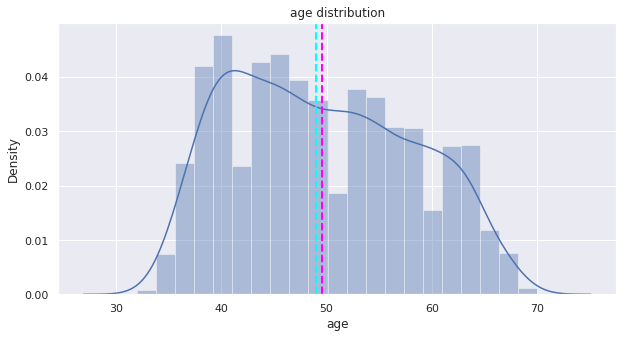

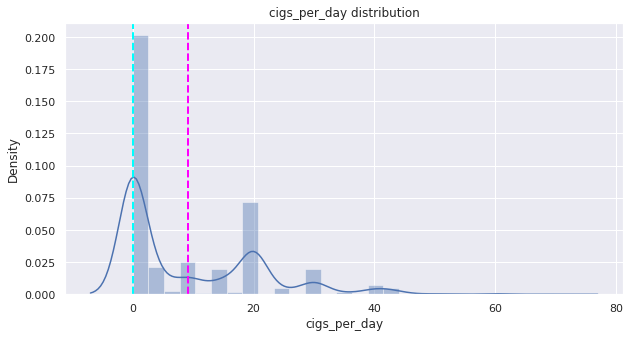

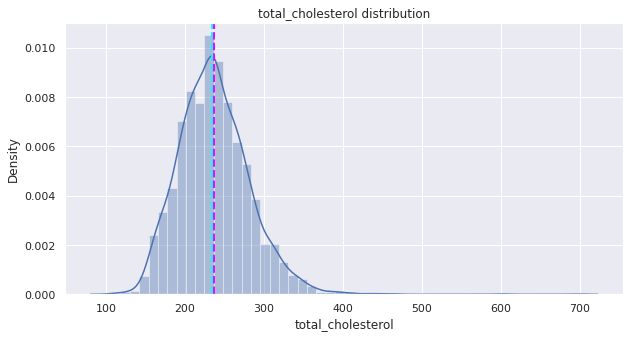

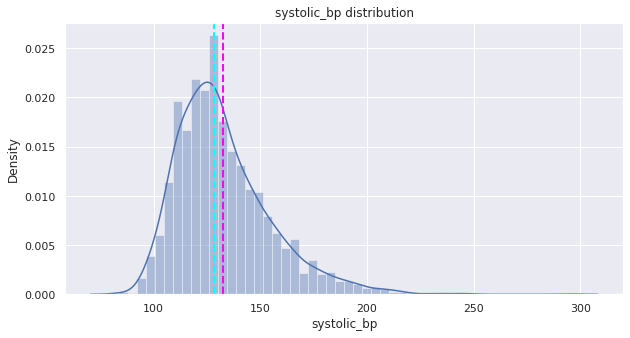

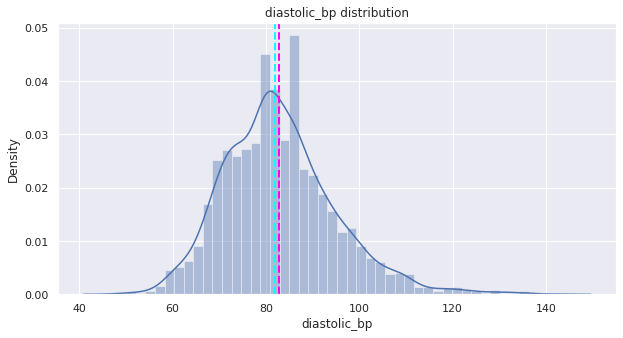

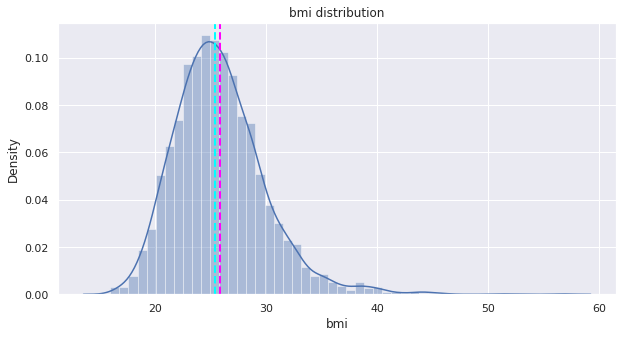

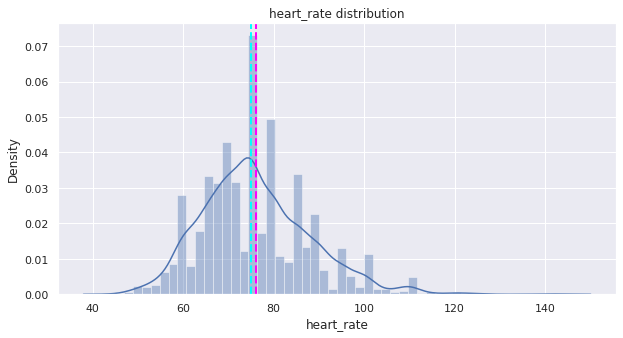

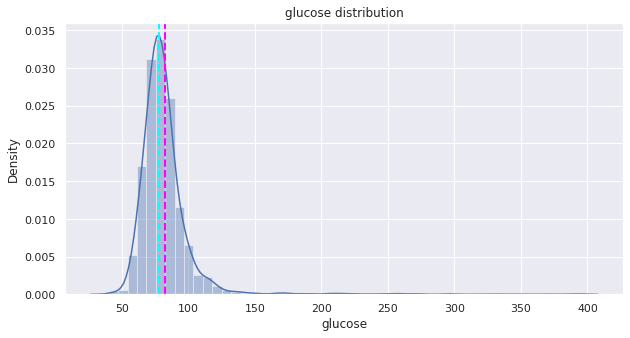

In [ ]:
# Analysing the distribution of continuous variables in the dataset
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

The distribution of several features is skewed. We'll deal with the skew afterwards.

**Analyzing the distribution of the discrete independent variables:**

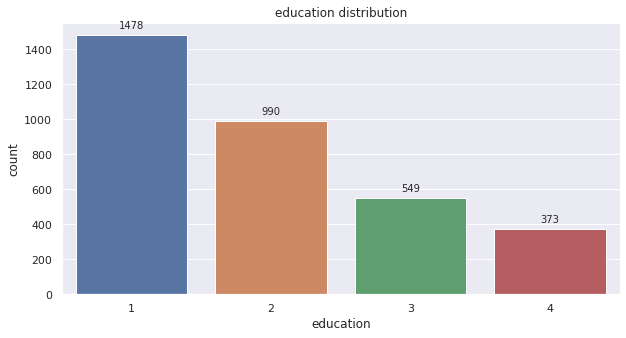

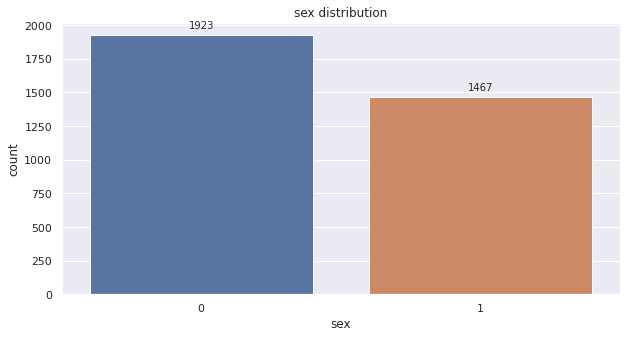

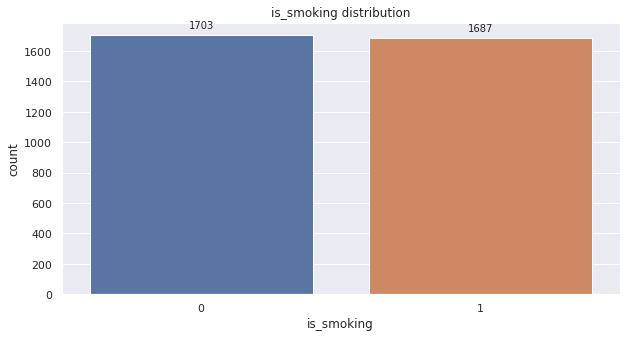

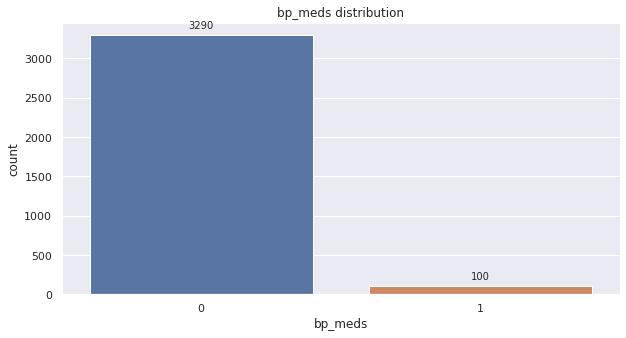

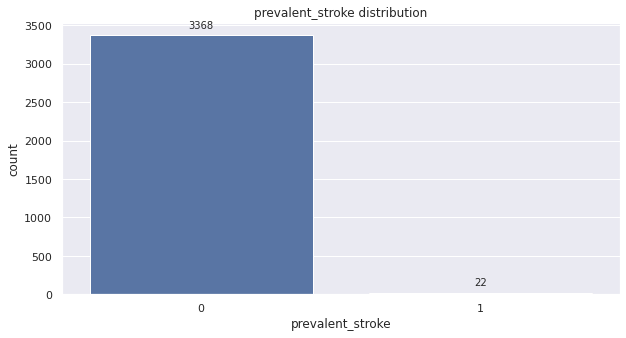

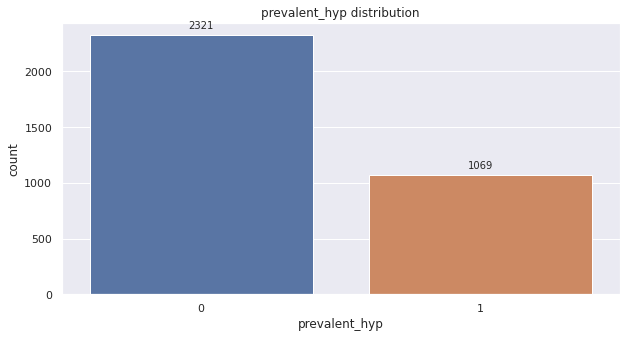

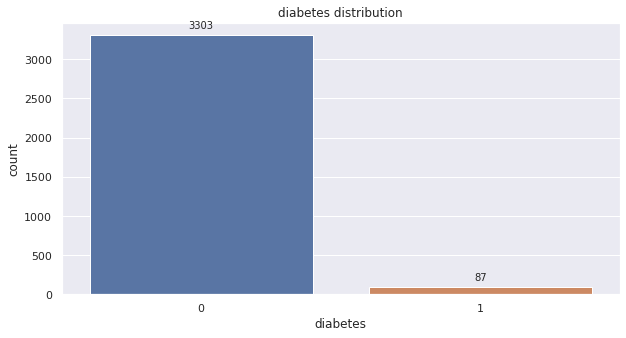

In [ ]:
# Analysing the distribution of categorical variables in the dataset
for i in categorical_var:
  plt.figure(figsize=(10,5))
  p = sns.countplot(df[i])
  plt.xlabel(i)
  plt.title(i+' distribution')
  for i in p.patches:
    p.annotate(f'{i.get_height()}', (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
  plt.show()

Summary:
* Majority of the patients belong to the education level 1, followed by 2, 3, and 4 respectively.
* There are more female patients compared to male patients.
* Almost half the patients are smokers.
* 100 patients under the study are undertaking blood pressure medication.
* 22 patients under the study have experienced a stroke.
* 1069 patients have hypertension.
* 87 patients have diabetes.

**Analyzing the relationship between the dependent variable and the continuous variables in the data:**

<Figure size 720x360 with 0 Axes>

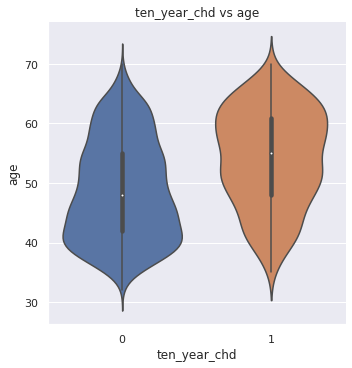

<Figure size 720x360 with 0 Axes>

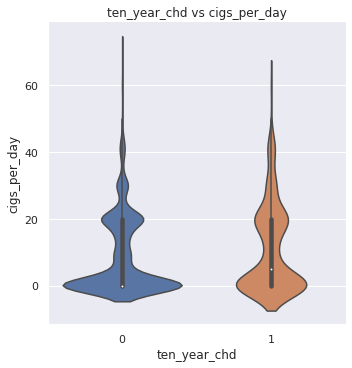

<Figure size 720x360 with 0 Axes>

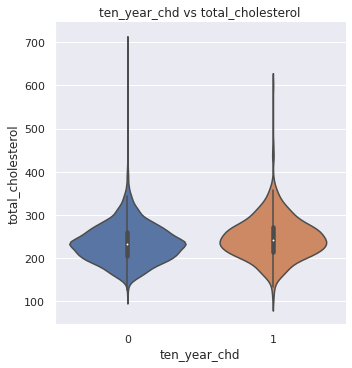

<Figure size 720x360 with 0 Axes>

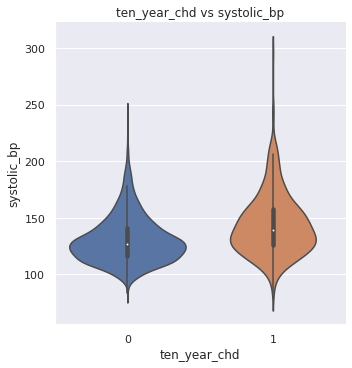

<Figure size 720x360 with 0 Axes>

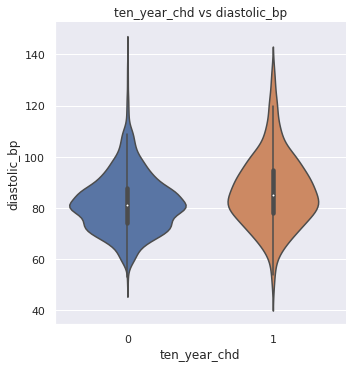

<Figure size 720x360 with 0 Axes>

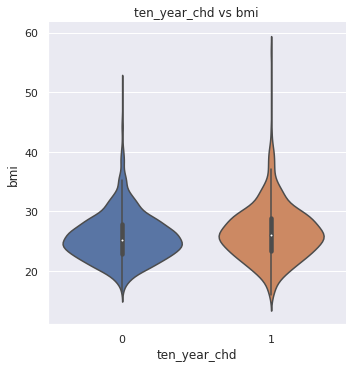

<Figure size 720x360 with 0 Axes>

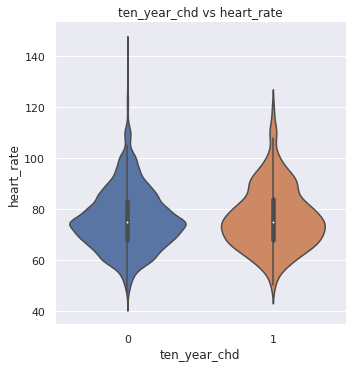

<Figure size 720x360 with 0 Axes>

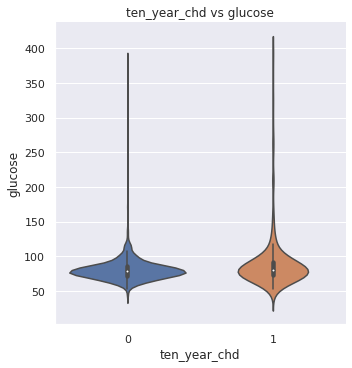

In [ ]:
# Relationship between the dependent variable and continuous independent variables
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=df,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()

Summary:
* The risk of CHD is higher for older patients than younger patients.

**Analyzing the relationship between the dependent variable and the discrete variables in the data:**

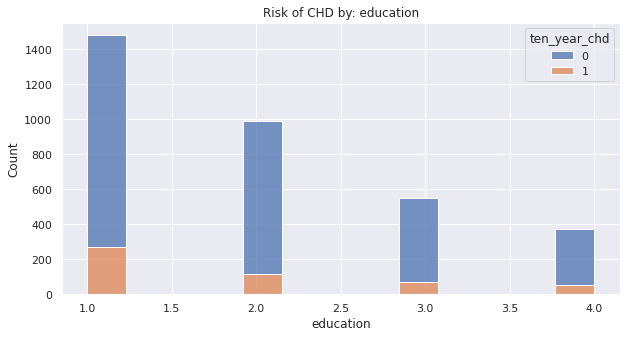

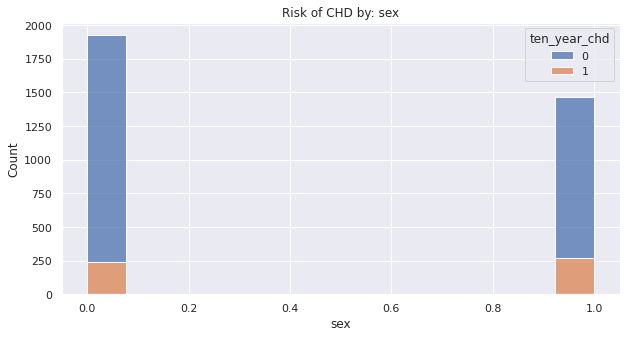

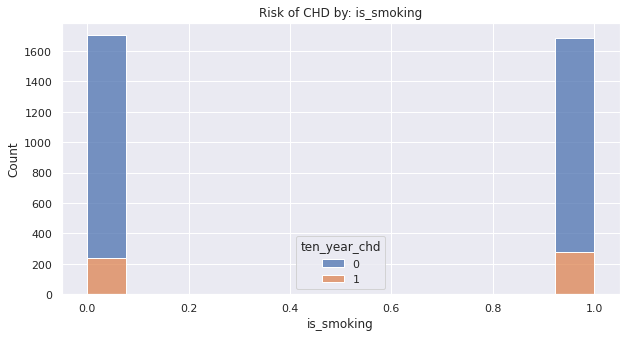

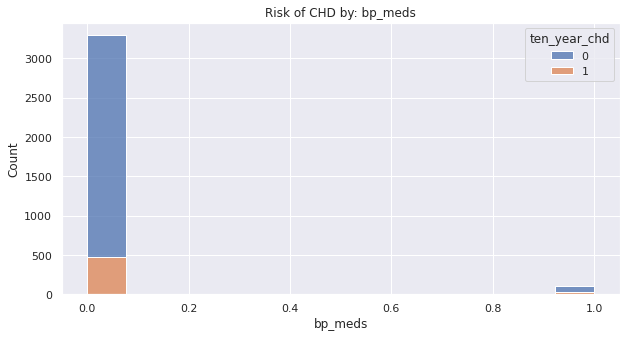

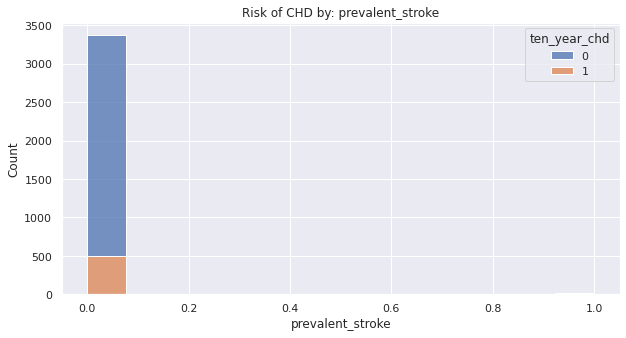

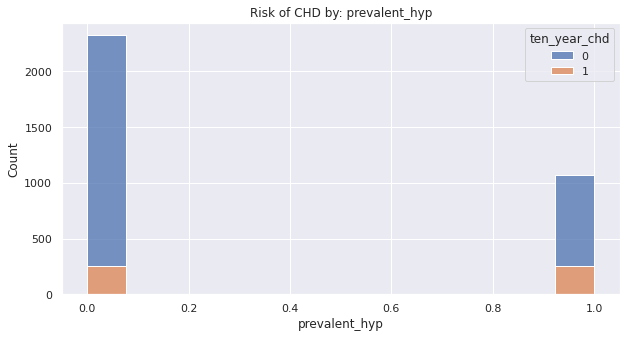

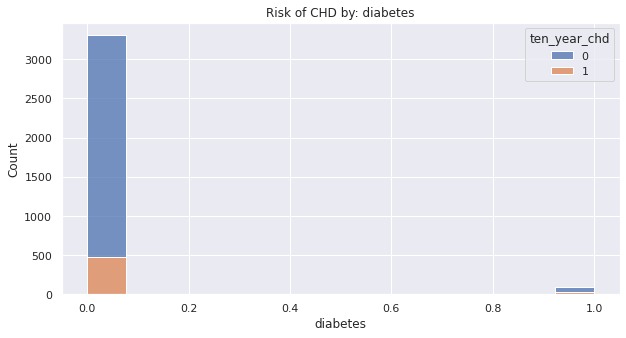

In [ ]:
# Analyzing the relationship between the dependent variable and categorical independent variables
for i in categorical_var:
  plt.figure(figsize=(10,5))
  sns.histplot(x=i, hue=dependent_var[0], data=df, stat="count", multiple="stack")
  plt.title('Risk of CHD by: '+i)
  # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
  plt.show()

* Since the attributes are unevenly distributed, it is difficult to make direct comparisons and draw conclusions.
* Let's build a 100% stacked bar chart to get a better idea of the distribution of the dependent variable.

<Figure size 720x360 with 0 Axes>

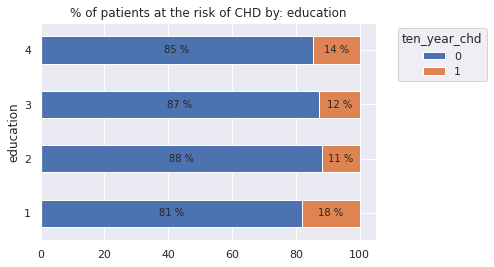

<Figure size 720x360 with 0 Axes>

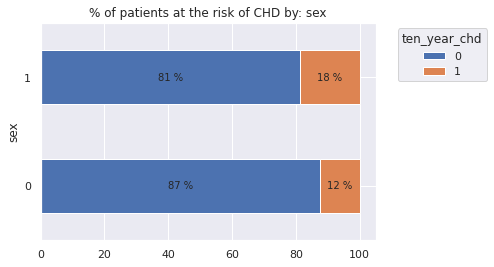

<Figure size 720x360 with 0 Axes>

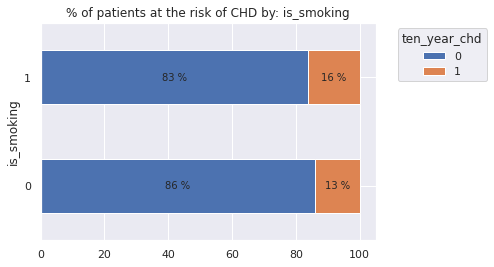

<Figure size 720x360 with 0 Axes>

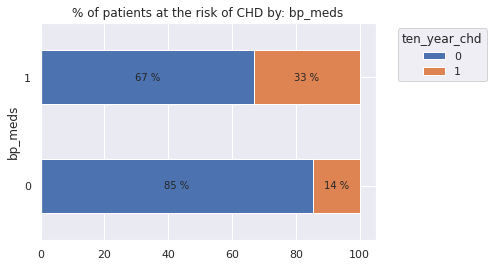

<Figure size 720x360 with 0 Axes>

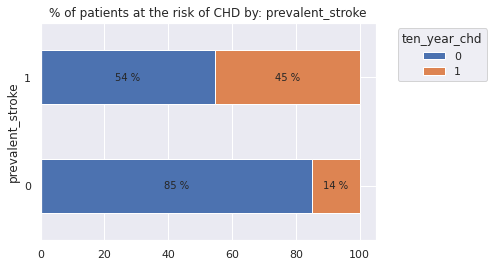

<Figure size 720x360 with 0 Axes>

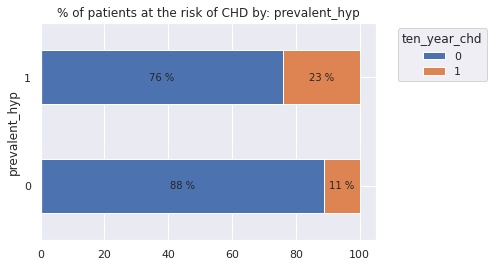

<Figure size 720x360 with 0 Axes>

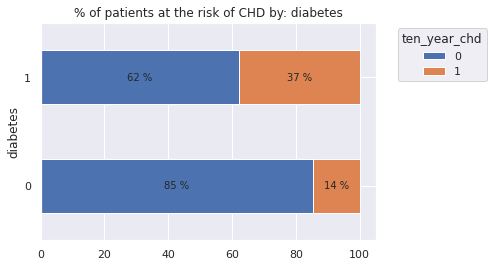

In [ ]:
# 100% stacked bar chart

for i in categorical_var:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True)
    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    cumulative + element / 2,
                    ix,
                    f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    plt.show()

Summary:
* 18%, 11%, 12%, 14% of the patients belonging to the education level 1, 2, 3, 4 respectively were eventually diagnosed with CHD.
* Male patients have significantly higher risk of CHD (18%) than female patients (12%)
* Patients who smoke have significantly higher risk of CHD (16%) than patients who don't smoke (13%)
* Patients who take BP medicines have significantly higher risk of CHD (33%) than other patients (14%)
* Patients who had experienced a stroke in their life have significantly higher risk of CHD (45%) than other patients (14%)
* Hypertensive patients have significantly higher risk of CHD (23%) than other patients (11%)
* Diabetic patients have significantly higher risk of CHD (37%) than other patients (14%)




**Correlation analysis:**

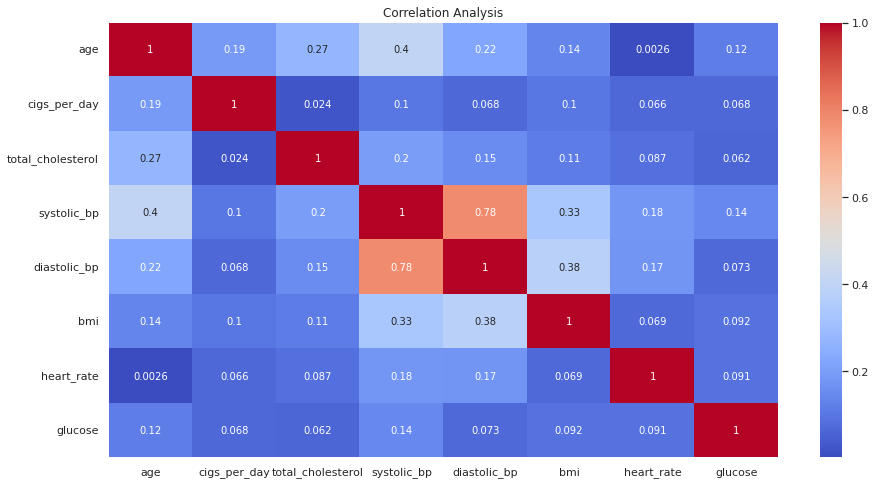

In [ ]:
# Correlation magnitude
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

* Above is the correlation heatmap for all the continuous variables in the dataset.
* The variables systolic BP and diastolic BP are highly correlated.

In [ ]:
# Range of systolic bp and diastolic bp

print(df['systolic_bp'].min(),df['systolic_bp'].max())
print(df['diastolic_bp'].min(),df['diastolic_bp'].max())

83.5 295.0
48.0 142.5


To handle the correlation between these two continuous variables, we can replace these two columns with a new variable 'pulse pressure', which is given as follows:

Pulse Pressure = Systolic BP - Diastolic BP

[Reference](https://my.clevelandclinic.org/health/symptoms/21629-pulse-pressure)

From the above resourse, we also found that:
* The normal pulse pressure is around 40 mmHg
* Pulse pressures of 50 mmHg or more can increase the risk of heart disease, heart rhythm disorders, stroke and more.
* Higher pulse pressures are also thought to play a role in eye and kidney damage from diseases like diabetes.
* Low pulse pressure - is where the pulse pressure is one-fourth or less of the systolic blood pressure.
* This happens when your heart isn’t pumping enough blood, which is seen in heart failure and certain heart valve diseases. It also happens when a person has been injured and lost a lot of blood or is bleeding internally.

In [ ]:
# Creating a new column pulse_pressure
# and dropping systolic_bp and diastolic_bp

df['pulse_pressure'] = df['systolic_bp']-df['diastolic_bp']
df.drop('systolic_bp',axis=1,inplace=True)
df.drop('diastolic_bp',axis=1,inplace=True)

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'pulse_pressure'],
      dtype='object')

In [ ]:
# Updating the continuous_var list

continuous_var.remove('systolic_bp')
continuous_var.remove('diastolic_bp')
continuous_var.append('pulse_pressure')

**Pulse pressure:**

Text(0.5, 1.0, 'Pulse Pressure Distribution')

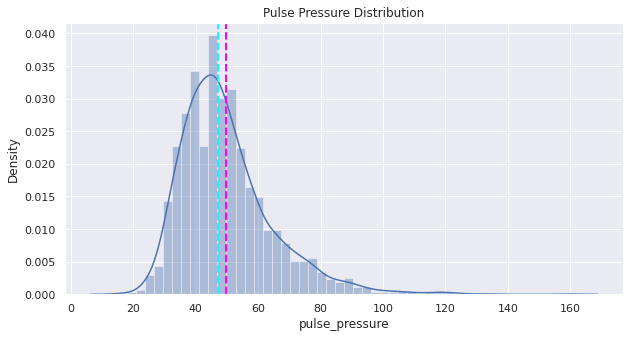

In [ ]:
# Analu=yzing the distribution of pulse_pressure
plt.figure(figsize=(10,5))
sns.distplot(df['pulse_pressure'])
plt.axvline(df['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['pulse_pressure'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Pulse Pressure Distribution')

<Figure size 720x360 with 0 Axes>

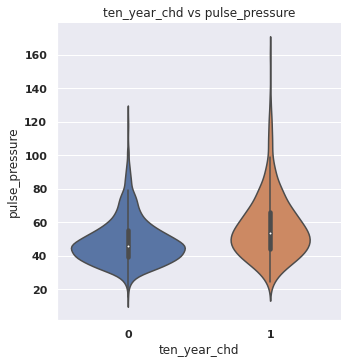

In [ ]:
# Relationship between pulse pressure with the dependent variable
plt.figure(figsize=(10,5))
sns.catplot(x=dependent_var[0],y='pulse_pressure',data=df,kind='violin')
plt.title('ten_year_chd vs pulse_pressure')
plt.show()

Summary:
* The pulse pressures are positively skewed
* On average, the patients with higher pulse pressure are exposed to the coronary heart disease over the period of 10 years.

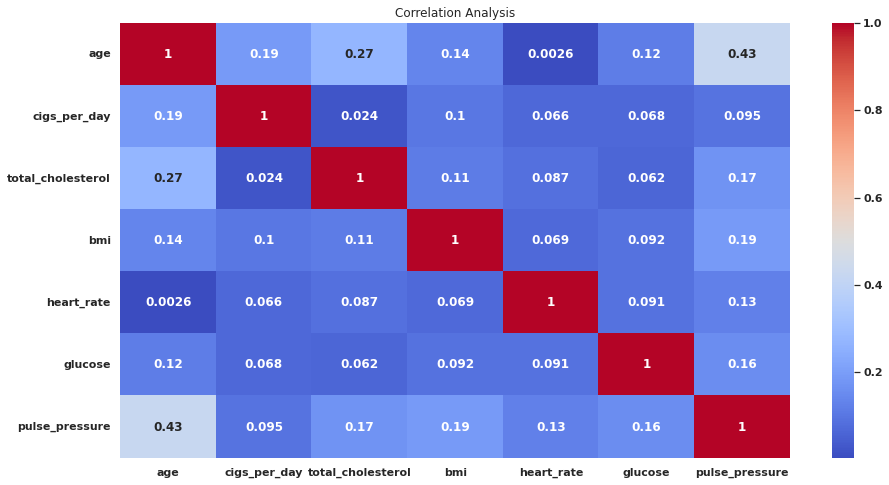

In [ ]:
# Updated correlations
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
correlation = df[continuous_var].corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

We were successful in handling multicollinearity amongst the continuous variables in the dataset.

# **Feature Selection:**

**Discrete feature selection:**

To check whether discrete variables are related, we define:

1. Null Hypothesis (H0): Two variables are independent.
2. Alternate Hypothesis (H1): Two variables are not independent.

If a variable is found to be not independent (p value greater than 0.05 for 95% confidence interval), we reject the null hypothesis, and accept the alternate hypothesis. By this we may choose to either drop the column with high p-value, or handle it in some other way.

In [ ]:
# chi2 scores
from sklearn.feature_selection import chi2
chi_scores = chi2(df[categorical_var],df[dependent_var])
chi_scores

(array([ 4.76184162, 13.77838959,  1.98522603, 25.10243827, 15.8619983 ,
        64.37770831, 35.50630598]),
 array([2.90973990e-02, 2.05688680e-04, 1.58840936e-01, 5.43640748e-07,
        6.81331780e-05, 1.02713702e-15, 2.54226209e-09]))

In [ ]:
# P values for discrete features
p_values = pd.Series(chi_scores[1],index = df[categorical_var].columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

is_smoking          1.588409e-01
education           2.909740e-02
sex                 2.056887e-04
prevalent_stroke    6.813318e-05
bp_meds             5.436407e-07
diabetes            2.542262e-09
prevalent_hyp       1.027137e-15
dtype: float64

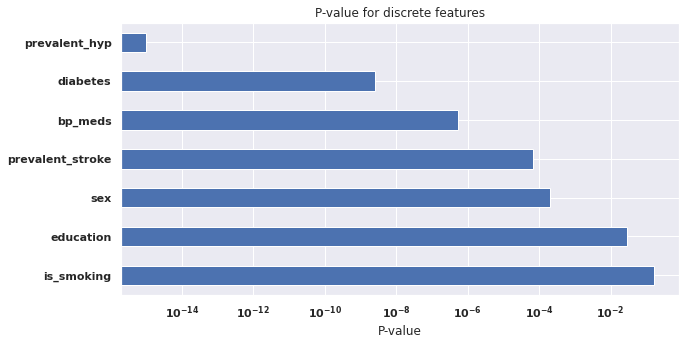

In [ ]:
# Plotting p values for discrete features
plt.figure(figsize=(10,5))
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh()

* Since prevalent hypertension column (prevalent_hyp) has the smallest p value, we can say that it is the most important feature (among the categorical independent variables) which determines  the outcome of the dependent variable.
* The is_smoking feature has the highest p-value, which indicates that it is the least important feature (among categorical independent variables).
* We can drop this column since we already have a column cigs_per_day, which gives the number of cigarettes smoked by the patient in a day. The patients who don't smoke have entered zero in this column.

In [ ]:
# dropping is_smoking
df.drop('is_smoking',axis=1,inplace=True)

In [ ]:
# dropping is smoking 
categorical_var.remove('is_smoking')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes']

**Outlier analysis:**

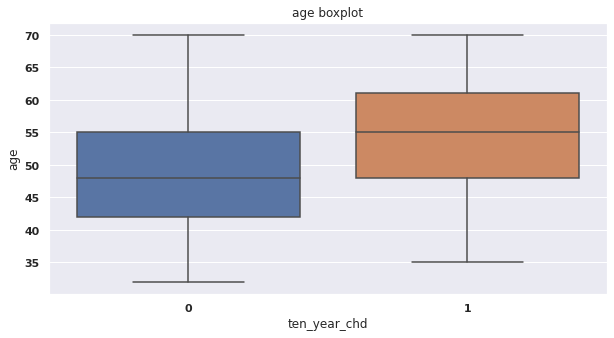

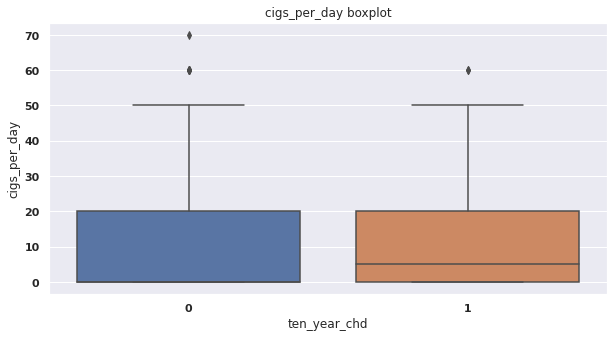

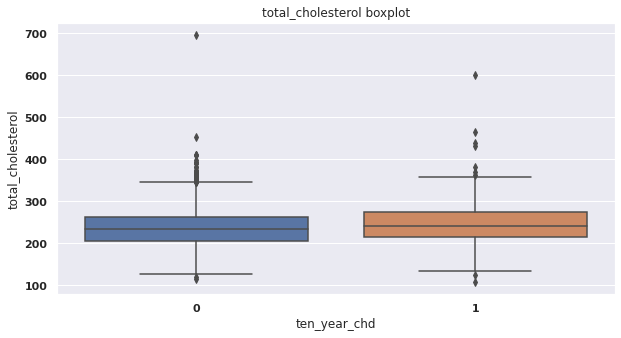

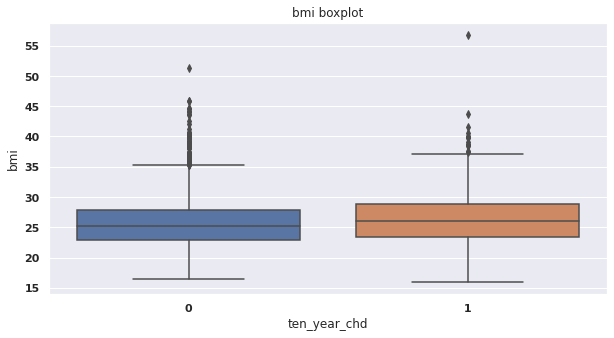

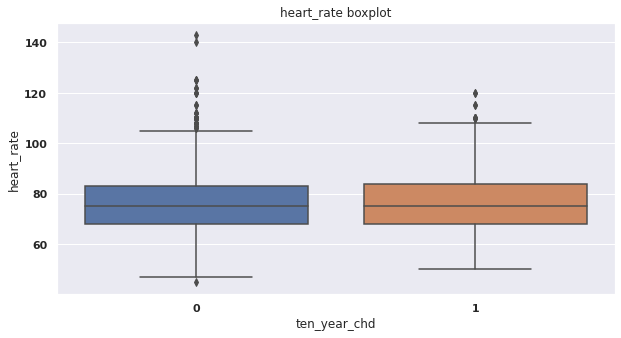

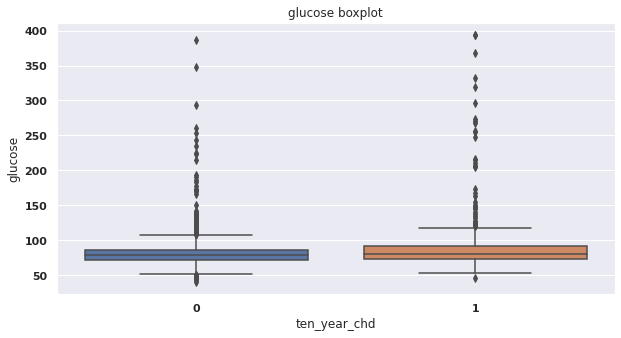

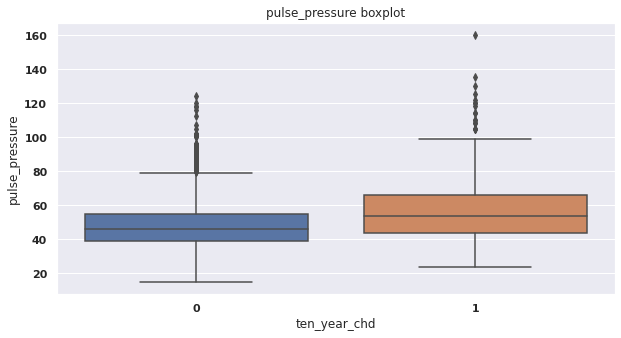

In [ ]:
# checking for outliers in continuous features
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.boxplot(y = col,x = dependent_var[0],data=df)
  plt.title(col+' boxplot')
  plt.show()

* There are outliers in the data, it is decided not to handle them at this point of time because from the EDA, it is understood that the patients with extreme  health conditions on average are more at risk from coronary heart diseases.
* The fact that we have outliers in the data must be considered while choosing prediction model in the model building phase.
* Though we have outliers, we can try to reduce the skew by applying different transformations. This will help in reducing the influence of outliers in the data.

**Transforming continuous variables to reduce skew:**

In [ ]:
# skewness along the index axis
(df[continuous_var]).skew(axis = 0)

age                  0.225796
cigs_per_day         1.204077
total_cholesterol    0.948170
bmi                  1.025551
heart_rate           0.676660
glucose              6.361911
pulse_pressure       1.412382
dtype: float64

We have many skewed continuous variables in the dataset. We aim to reduce the magnitude of skew in these variables, since they will impact our prediction model. The goal here is to bring the skew for all continuous variables within the range [-0.5, 0.5], ie, almost normally distributed.

In [ ]:
# Skew for sqrt transformation
np.sqrt(df[continuous_var]).skew(axis = 0)

age                  0.103528
cigs_per_day         0.459793
total_cholesterol    0.410514
bmi                  0.663534
heart_rate           0.411092
glucose              3.998158
pulse_pressure       0.840977
dtype: float64

In [ ]:
# Skew for log10 transformation
np.log10(df[continuous_var]+1).skew(axis = 0)

age                 -0.015053
cigs_per_day         0.275072
total_cholesterol    0.011860
bmi                  0.370422
heart_rate           0.165898
glucose              2.310918
pulse_pressure       0.354174
dtype: float64

In [ ]:
# Skew for reciprocal transformation
np.reciprocal(df[continuous_var]).skew(axis = 0)

age                  0.000000
cigs_per_day         0.009444
total_cholesterol    0.681465
bmi                  0.198110
heart_rate           0.327473
glucose             -0.297404
pulse_pressure       0.736008
dtype: float64

* We can log transform all continuous dependent variables to reduce skew and bring it within the range of [-0.5, 0.5] except the 'glucose' variable.
* This is because 'glucose' is extremely skewed to the right, hence we can inverse transform it to reduce the skew.

In [ ]:
# Transforming continuous variables

df['age']                   = np.log10(df['age']+1)
df['cigs_per_day']          = np.log10(df['cigs_per_day']+1)
df['total_cholesterol']     = np.log10(df['total_cholesterol']+1)
df['bmi']                   = np.log10(df['bmi']+1)
df['heart_rate']            = np.log10(df['heart_rate']+1)
df['glucose']               = np.reciprocal(df['glucose'])
df['pulse_pressure']        = np.log10(df['pulse_pressure']+1)

In [ ]:
# Checking skew after transformation
df[continuous_var].skew(axis = 0)

age                 -0.015053
cigs_per_day         0.275072
total_cholesterol    0.011860
bmi                  0.370422
heart_rate           0.165898
glucose             -0.297404
pulse_pressure       0.354174
dtype: float64

**Analyzing the distribution:**

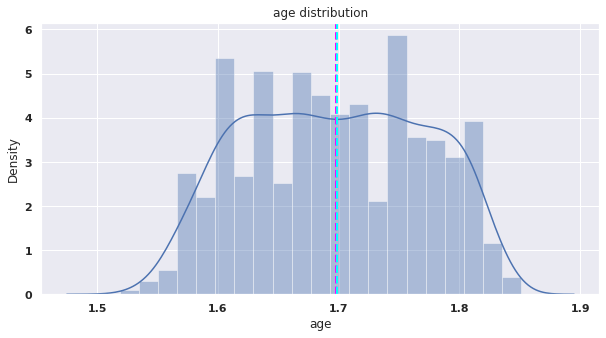

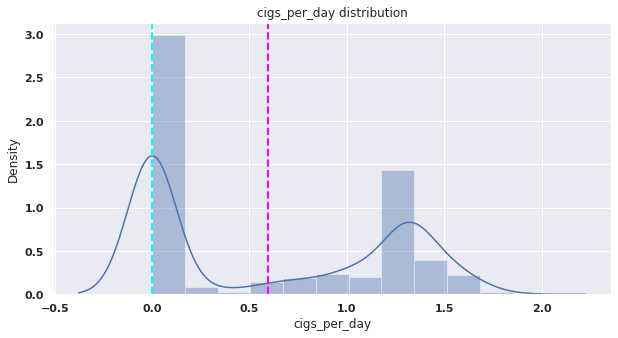

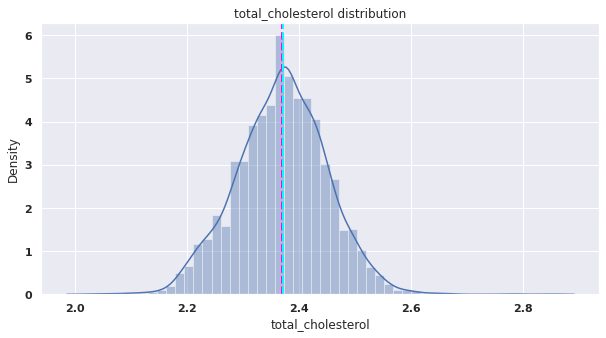

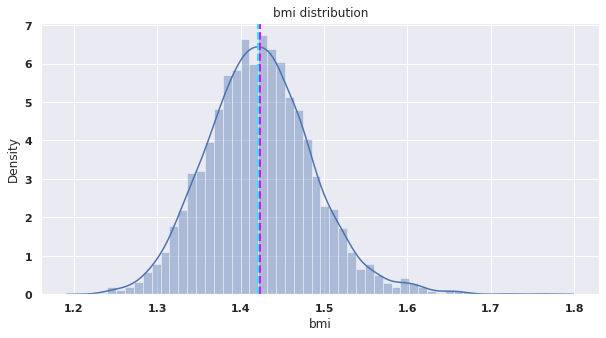

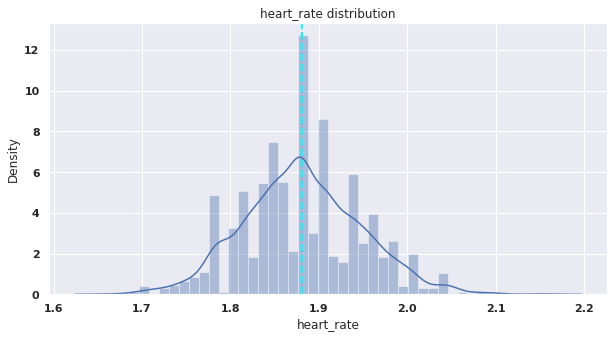

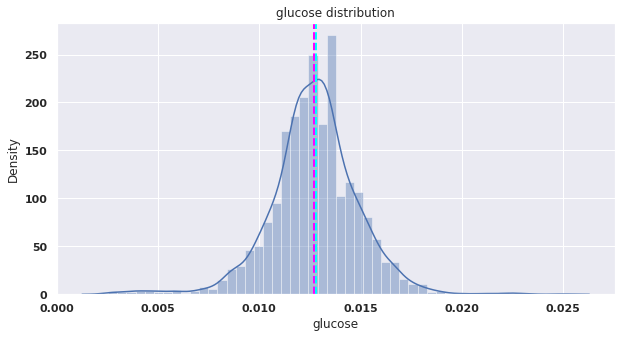

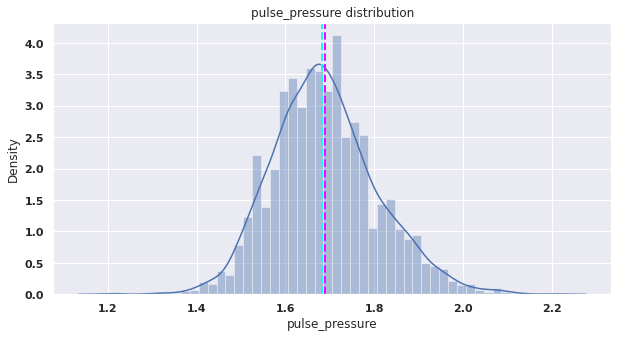

In [ ]:
# Analysing the distribution of continuous varaibles after transformation
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

We have successfully been able to reduce the skewness in the continuous variables. Now these distributions are closer to symmetric distribution.

# **Modelling:**

In [ ]:
# Defining dependent and independent variables
X = df.drop('ten_year_chd',axis=1)
y = df[dependent_var]

**Choice of prediction model:**

* We are working on binary classification problem.
* Here we can start with a simple model, as a baseline model, which is interpretable, ie, Logistic Regression
* Try other standard binary classification models like  K nearest neighbors, Naive Bayes, decision tree classifier, and support vector machines.
* Use ensemble models, with hyperparameter tuning to check whether they give better predictions.

**Evaluation metrics:**
* Since the data we are dealing with is unbalanced, accuracy may not be the best evaluation metric to evaluate the model performance.
* Also, since we are dealing with data related to healthcare, False Negatives are of higher concern than False Positive
* In other words, it doesn’t matter whether we raise a false alarm but the actual positive cases should not go undetected
* Considering these points in mind, it is decided that we use **Recall** as the model evaluation metric.
\begin{align}
        Recall = \frac{True Positive}{True Positive + False Negative}
    \end{align}

In [ ]:
# function to get recall score
from sklearn.metrics import recall_score

def recall(actual,predicted):
  '''
  recall(actual,predicted)
  '''
  return recall_score(y_true=actual, y_pred=predicted, average='binary')

**Sampling:**

* Since we are dealing with unbalanced data, ie, only ~15% of the patients were diagnosed with coronary heart disease, we oversample the train dataset using SMOTE (Synthetic Minority Oversampling Technique).
* This ensures that the model has trained equally on all kinds of results, and it is not biased to one particular result.

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y, shuffle=True)

In [ ]:
# Checking the train distribution of dependent variable
y_train.value_counts()

ten_year_chd
0               2015
1                358
dtype: int64

In [ ]:
# Proportion of positive outcomes in train dataset
358/(358+2015)

0.15086388537715972

In [ ]:
# Checking the test distribution of dependent variable
y_test.value_counts()

ten_year_chd
0               864
1               153
dtype: int64

In [ ]:
# Proportion of positive outcomes in test dataset
153/(153+864)

0.1504424778761062

The train and test set contain almost equal proportion of results.

**Oversampling using SMOTE on the train dataset:**

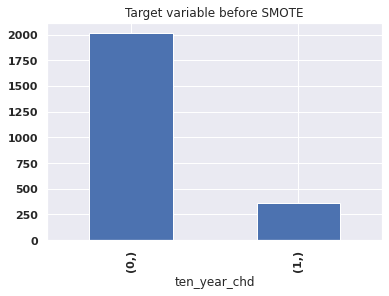

In [ ]:
# visualize the target variable before SMOTE
y_train.value_counts().plot(kind='bar', title='Target variable before SMOTE')

In [ ]:
# Oversampling using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Samples in the original dataset', len(y_train))
print('Samples in the resampled dataset', len(y_smote))

Samples in the original dataset 2373
Samples in the resampled dataset 4030


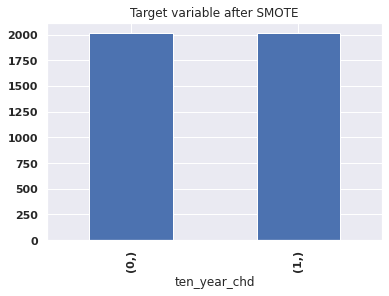

In [ ]:
# visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

* We have successfully oversampled the minority class using SMOTE. Now the model we build will be able to learn from both the classes without any bias.


**Scaling the data:**
* Since the predictions from the distance based models will get affected if the attributes are in different ranges, we need to scale them.
* We can use StandardScaler to scale down the variables.
* The results obtained from scaling can be stored and used while building those models.
* Tree algorithms do not necessarily require scaling.

In [ ]:
# Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_smote_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)

# Converting array to dataframe
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_smote_scaled = pd.DataFrame(X_smote_scaled,columns=X_smote.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [ ]:
X_train_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,1.352753,1.042877,1.126340,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.265877,-0.544536,-0.273259,0.466909,0.008708
1,0.238381,-0.929033,1.126340,1.418967,-0.178155,-0.087426,-0.685091,-0.171759,0.155470,0.790639,-0.457348,1.027371,-0.066953
2,0.872536,-0.929033,1.126340,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.686137,0.637178,-0.183098,-1.222883,-0.386237
3,1.444209,-0.929033,-0.887831,-0.926396,-0.178155,-0.087426,1.459660,-0.171759,2.342925,0.432564,0.812784,-1.355952,1.211142
4,0.457551,-0.929033,-0.887831,1.152968,-0.178155,-0.087426,-0.685091,-0.171759,0.199905,-1.703481,-0.457348,0.382335,0.008708


In [ ]:
X_smote_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,1.174148,1.123354,1.056691,1.104715,-0.178914,-0.075762,-0.822419,-0.182574,0.196396,-0.639590,-0.300756,0.514888,-0.192897
1,-0.000190,-0.858313,1.056691,1.367902,-0.178914,-0.075762,-0.822419,-0.182574,0.080403,0.733353,-0.499043,1.056052,-0.266972
2,0.668090,-0.858313,1.056691,1.104715,-0.178914,-0.075762,-0.822419,-0.182574,0.637926,0.575552,-0.203641,-1.116724,-0.579560
3,1.270525,-0.858313,-0.946350,-0.952670,-0.178914,-0.075762,1.215925,-0.182574,2.378561,0.365150,0.869053,-1.245212,0.984320
4,0.230774,-0.858313,-0.946350,1.104715,-0.178914,-0.075762,-0.822419,-0.182574,0.127086,-1.831319,-0.499043,0.433225,-0.192897


In [ ]:
X_test_scaled.head()

,age,education,sex,cigs_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,bmi,heart_rate,glucose,pulse_pressure
0,-1.760752,0.132521,1.056691,1.104715,-0.178914,-0.075762,1.215925,-0.182574,0.377170,0.726364,0.441508,1.474095,-0.746683
1,-0.750494,2.114188,1.056691,0.258141,-0.178914,-0.075762,1.215925,-0.182574,-0.232825,0.841950,-1.820565,-0.338243,0.822225
2,-1.454697,0.132521,-0.946350,-0.952670,-0.178914,-0.075762,-0.822419,-0.182574,-1.382895,-1.349940,-0.499043,0.055925,-0.381029
3,-0.363850,-0.858313,-0.946350,-0.952670,-0.178914,-0.075762,-0.822419,-0.182574,0.927666,0.409207,-0.300756,0.200965,0.286815
4,-0.885001,0.132521,-0.946350,1.367902,-0.178914,-0.075762,-0.822419,-0.182574,0.196396,-0.339732,-1.129264,-0.013876,-0.459130


**1. Logistic Regression**

In [ ]:
# Importing logistic regression model
# Accuracy score is used to check the model accuracy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# Fitting model
lr_model = LogisticRegression()

In [ ]:
# training the model
lr_model.fit(X_smote_scaled, y_smote)

LogisticRegression()

In [ ]:
# Train predictions
lr_train_pred = lr_model.predict(X_smote_scaled)

In [ ]:
# training set recall
lr_train_recall = recall(y_smote,lr_train_pred)
lr_train_recall

0.6923076923076923

In [ ]:
# Test predictions
lr_test_pred = lr_model.predict(X_test_scaled)

In [ ]:
# Test recall
lr_test_recall = recall(y_test,lr_test_pred)
lr_test_recall

0.6601307189542484

In [ ]:
# Classification report
print(classification_report(y_test,lr_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78       864
           1       0.27      0.66      0.38       153

    accuracy                           0.68      1017
   macro avg       0.59      0.67      0.58      1017
weighted avg       0.82      0.68      0.72      1017



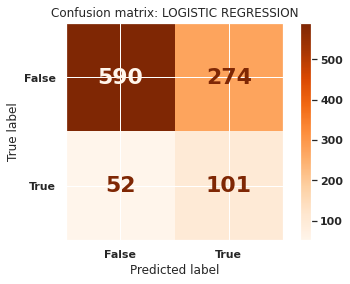

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
lr_confusion_matrix = cm(y_test, lr_test_pred)
cm_display = cmd(confusion_matrix = lr_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: LOGISTIC REGRESSION')
plt.show()

**2. K Nearest Neighbors:**

In [ ]:
# Importing knn classifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Value of k taken upto sqrt(n)
# Where n is no of records in the train dataset
# sqrt(4030) = 63.48
knn_test_res = []
knn_train_res = []
for k in range(1,65):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_smote_scaled, y_smote)
  knn_train_pred = knn_model.predict(X_smote_scaled)
  knn_train_recall = recall(y_smote,knn_train_pred)
  knn_test_pred = knn_model.predict(X_test_scaled)
  knn_test_recall = recall(y_test,knn_test_pred)
  knn_test_res.append(knn_test_recall)
  knn_train_res.append(knn_train_recall)

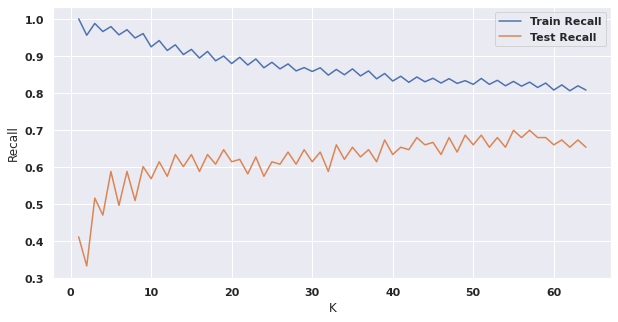

In [ ]:
# Plotting the train and test recalls for different values of k
plt.figure(figsize=(10,5))
x_ = range(1,65)
y1 = knn_train_res
y2 = knn_test_res
plt.plot(x_, y1, label='Train Recall')
plt.plot(x_, y2, label = 'Test Recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [ ]:
# Best k is where the test recall is the highest
best_k = knn_test_res.index(max(knn_test_res))+1
best_k

55

In [ ]:
# building knn model with best parameters
knn_model = KNeighborsClassifier(n_neighbors=best_k)

In [ ]:
# training the model
knn_model.fit(X_smote_scaled, y_smote)

KNeighborsClassifier(n_neighbors=55)

In [ ]:
# Train predictions
knn_train_pred = knn_model.predict(X_smote_scaled)

In [ ]:
# training set recall
knn_train_recall = recall(y_smote,knn_train_pred)
knn_train_recall

0.8312655086848635

In [ ]:
# Test predictions
knn_test_pred = knn_model.predict(X_test_scaled)

In [ ]:
# Test recall
knn_test_recall = recall(y_test,knn_test_pred)
knn_test_recall

0.6993464052287581

In [ ]:
# Classification report
print(classification_report(y_test,knn_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.59      0.72       864
           1       0.23      0.70      0.35       153

    accuracy                           0.61      1017
   macro avg       0.58      0.65      0.53      1017
weighted avg       0.81      0.61      0.66      1017



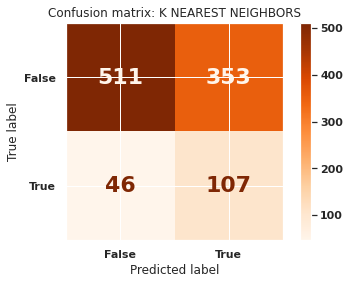

In [ ]:
# Confusion matrix
knn_confusion_matrix = cm(y_test, knn_test_pred)
cm_display = cmd(confusion_matrix = knn_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: K NEAREST NEIGHBORS')
plt.show()

**3. Naive Bayes:**

In [ ]:
# Importing naive Bayes classifier from sklearn
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Importing gridsearchcv for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [ ]:
# Using stratified k fold cross validation so that each split 
# has almost equal proportion of classification results
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=4,
                                    n_repeats=3, 
                                    random_state=0)

In [ ]:
# Fitting model
nb_model = GaussianNB()

In [ ]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
nb_model = GaussianNB()
nb_params = {'var_smoothing': np.logspace(0,-9, num=100)
             }

In [ ]:
nb_gridsearch = GridSearchCV(nb_model,
                             nb_params,
                             cv=cv_method,
                             scoring= 'recall')
nb_gridsearch.fit(X_smote_scaled,y_smote)
nb_best_params = nb_gridsearch.best_params_

In [ ]:
# model best parameters
nb_best_params

{'var_smoothing': 0.657933224657568}

In [ ]:
# building knn model with best parameters
nb_model = GaussianNB(var_smoothing=nb_best_params['var_smoothing'])

In [ ]:
# training the model
nb_model.fit(X_smote_scaled, y_smote)

GaussianNB(var_smoothing=0.657933224657568)

In [ ]:
# Train predictions
nb_train_pred = nb_model.predict(X_smote_scaled)

In [ ]:
# training set recall
nb_train_recall = recall(y_smote,nb_train_pred)
nb_train_recall

0.5330024813895782

In [ ]:
# Test predictions
nb_test_pred = nb_model.predict(X_test_scaled)

In [ ]:
# Test recall
nb_test_recall = recall(y_test,nb_test_pred)
nb_test_recall

0.5098039215686274

In [ ]:
# Classification report
print(classification_report(y_test,nb_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83       864
           1       0.28      0.51      0.36       153

    accuracy                           0.73      1017
   macro avg       0.59      0.64      0.60      1017
weighted avg       0.81      0.73      0.76      1017



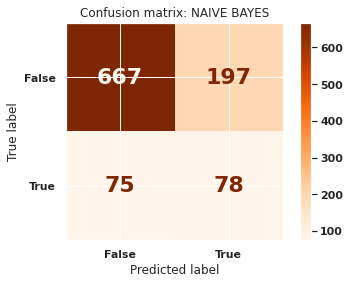

In [ ]:
# Confusion matrix
nb_confusion_matrix = cm(y_test, nb_test_pred)
cm_display = cmd(confusion_matrix = nb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: NAIVE BAYES')
plt.show()

**4. Decision tree:**

In [ ]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Max depth of dt without hyperparameter tuning = 28 and min samples leaf = 1
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth':np.arange(1,10),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)
             }

In [ ]:
# using gridsearchcv to find best parameters
dt_gridsearch = GridSearchCV(dt_model,
                             dt_params,
                             cv=cv_method,
                             scoring= 'recall')
dt_gridsearch.fit(X_smote,y_smote)
dt_best_params = dt_gridsearch.best_params_

In [ ]:
# model best parameters
dt_best_params

{'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}

In [ ]:
# building knn model with best parameters
dt_model = DecisionTreeClassifier(max_depth=dt_best_params['max_depth'],
                                  min_samples_split=dt_best_params['min_samples_split'],
                                  min_samples_leaf=dt_best_params['min_samples_leaf'])

In [ ]:
# training the model 
dt_model.fit(X_smote_scaled, y_smote)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1)

In [ ]:
# Train predictions
dt_train_pred = dt_model.predict(X_smote_scaled)

In [ ]:
# training set recall
dt_train_recall = recall(y_smote,dt_train_pred)
dt_train_recall

0.8600496277915632

In [ ]:
# Test predictions
dt_test_pred = dt_model.predict(X_test_scaled)

In [ ]:
# Test recall
dt_test_recall = recall(y_test,dt_test_pred)
dt_test_recall

0.7712418300653595

In [ ]:
# Classification report
print(classification_report(y_test,dt_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.47      0.62       864
           1       0.21      0.77      0.32       153

    accuracy                           0.52      1017
   macro avg       0.56      0.62      0.47      1017
weighted avg       0.81      0.52      0.58      1017



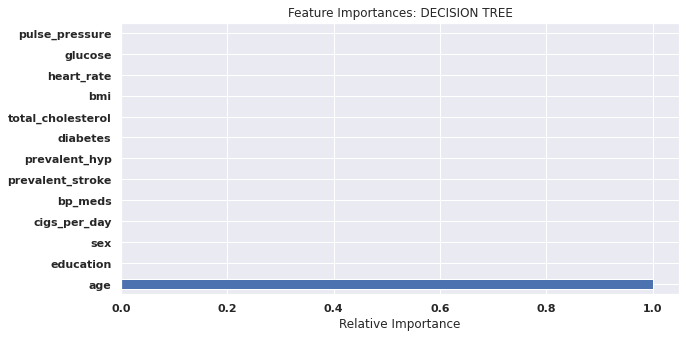

In [ ]:
# Feature importances

dt_feat_imp = pd.Series(dt_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: DECISION TREE')
plt.xlabel('Relative Importance')
dt_feat_imp.nlargest(20).plot(kind='barh')

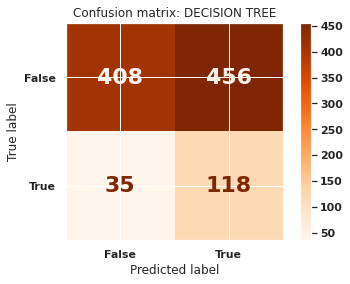

In [ ]:
# Confusion matrix
dt_confusion_matrix = cm(y_test, dt_test_pred)
cm_display = cmd(confusion_matrix = dt_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: DECISION TREE')
plt.show()

**5. Support Vector Machines:**

In [ ]:
# Importing Support vector classifier
from sklearn.svm import SVC

In [ ]:
# SVM model parameters
svm_model = SVC()
svm_params = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }

In [ ]:
# Using gridsearchcv to find best parameters
svm_gridsearch = GridSearchCV(svm_model,
                              svm_params,
                              cv=cv_method,
                              scoring= 'recall')
svm_gridsearch.fit(X_smote_scaled,y_smote)
svm_best_params = svm_gridsearch.best_params_

In [ ]:
# model best parameters
svm_best_params

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
# building knn model with best parameters
svm_model = SVC(C=svm_best_params['C'],
                gamma=svm_best_params['gamma'],
                kernel=svm_best_params['kernel']
                )

In [ ]:
# training the model 
svm_model.fit(X_smote_scaled, y_smote)

SVC(C=1, gamma=0.01)

In [ ]:
# Train predictions
svm_train_pred = svm_model.predict(X_smote_scaled)

In [ ]:
# training set recall
svm_train_recall = recall(y_smote,svm_train_pred)
svm_train_recall

0.7478908188585608

In [ ]:
# Test predictions
svm_test_pred = svm_model.predict(X_test_scaled)

In [ ]:
# Test recall
svm_test_recall = recall(y_test,svm_test_pred)
svm_test_recall

0.6993464052287581

In [ ]:
# Classification report
print(classification_report(y_test,svm_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76       864
           1       0.26      0.70      0.38       153

    accuracy                           0.66      1017
   macro avg       0.59      0.67      0.57      1017
weighted avg       0.82      0.66      0.71      1017



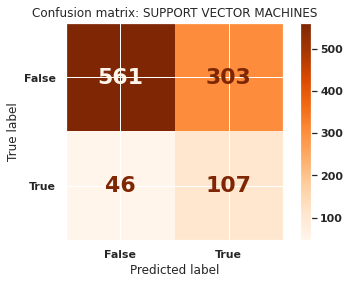

In [ ]:
# Confusion matrix
svm_confusion_matrix = cm(y_test, svm_test_pred)
cm_display = cmd(confusion_matrix = svm_confusion_matrix, display_labels = [False, True])

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: SUPPORT VECTOR MACHINES')
plt.show()

**6. Random forests:**

In [ ]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# random forest model
rf_model = RandomForestClassifier(random_state=0)
rf_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':np.arange(1,6),
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [ ]:
# using gridsearchcv to find best parameters
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=cv_method,scoring='recall')
rf_gridsearch.fit(X_smote,y_smote)
rf_best_params = rf_gridsearch.best_params_

In [ ]:
# best parameters for random forests
rf_best_params

{'max_depth': 2,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [ ]:
# Fitting RF model with best parameters
rf_model = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'],
                                  min_samples_leaf=rf_best_params['min_samples_leaf'],
                                  min_samples_split=rf_best_params['min_samples_split'],
                                  max_depth=rf_best_params['max_depth'],
                                  random_state=0)

In [ ]:
# fit
rf_model.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=2, min_samples_leaf=0.1, min_samples_split=0.1,
                       n_estimators=500, random_state=0)

In [ ]:
# train predictions
rf_train_pred = rf_model.predict(X_smote)

In [ ]:
# train recall
rf_train_recall = recall(y_smote,rf_train_pred)
rf_train_recall

0.7062034739454094

In [ ]:
# Test predictions
rf_test_pred = rf_model.predict(X_test)

In [ ]:
# test recall
rf_test_recall = recall(y_test,rf_test_pred)
rf_test_recall

0.6601307189542484

In [ ]:
# Classification report
print(classification_report(y_test,rf_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77       864
           1       0.26      0.66      0.37       153

    accuracy                           0.66      1017
   macro avg       0.59      0.66      0.57      1017
weighted avg       0.82      0.66      0.71      1017



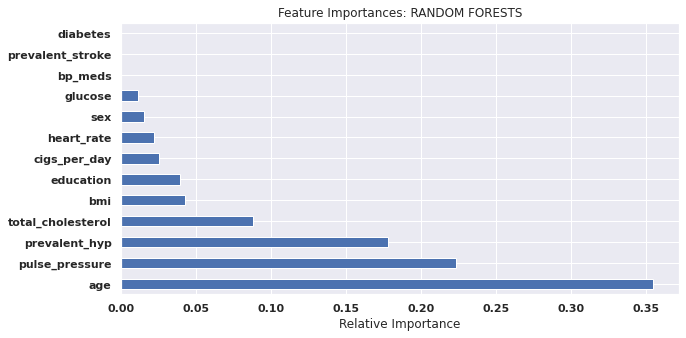

In [ ]:
# Feature importances

rf_feat_imp = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

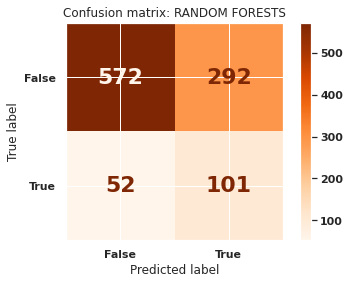

In [ ]:
# Confusion matrix
rf_confusion_matrix = cm(y_test, rf_test_pred)
cm_display = cmd(confusion_matrix = rf_confusion_matrix, display_labels = [False, True])

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: RANDOM FORESTS')
plt.show()

**7. XG Boost:**

In [ ]:
# Importing xgboost
import xgboost as xgb

In [ ]:
# XGBOOST model
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_params = {'n_estimators':[500],                    # limited due to computational power availability
             'max_depth':[1],
             'min_samples_split':np.arange(0.1,1,0.1),
             'min_samples_leaf':np.arange(0.1,0.6,0.1)}

In [ ]:
# using gridsearchcv to find best parameters
xgb_gridsearch = GridSearchCV(xgb_model,xgb_params,cv=cv_method,scoring='recall')
xgb_gridsearch.fit(X_smote_scaled,y_smote)
xgb_best_params = xgb_gridsearch.best_params_

In [ ]:
# best parameters for xgboost classifier
xgb_best_params

{'max_depth': 1,
 'min_samples_leaf': 0.1,
 'min_samples_split': 0.1,
 'n_estimators': 500}

In [ ]:
# Fitting xgb with best parameters
xgb_model = xgb.XGBClassifier(n_estimators=xgb_best_params['n_estimators'],
                                  min_samples_leaf=xgb_best_params['min_samples_leaf'],
                                  min_samples_split=xgb_best_params['min_samples_split'],
                                  max_depth=xgb_best_params['max_depth'],
                                  random_state=0)

In [ ]:
# fit
xgb_model.fit(X_smote_scaled,y_smote)

XGBClassifier(max_depth=1, min_samples_leaf=0.1, min_samples_split=0.1,
              n_estimators=500)

In [ ]:
# train predictions
xgb_train_pred = xgb_model.predict(X_smote_scaled)
xgb_train_pred = [round(value) for value in xgb_train_pred]

In [ ]:
# train recall
xgb_train_recall = recall(y_smote,xgb_train_pred)
xgb_train_recall

0.7831265508684864

In [ ]:
# Test predictions
xgb_test_pred = xgb_model.predict(X_test_scaled)
xgb_test_pred = [round(value) for value in xgb_test_pred]

In [ ]:
# test recall
xgb_test_recall = recall(y_test,xgb_test_pred)
xgb_test_recall

0.6013071895424836

In [ ]:
# Classification report
print(classification_report(y_test,xgb_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       864
           1       0.26      0.60      0.37       153

    accuracy                           0.69      1017
   macro avg       0.59      0.65      0.58      1017
weighted avg       0.81      0.69      0.73      1017



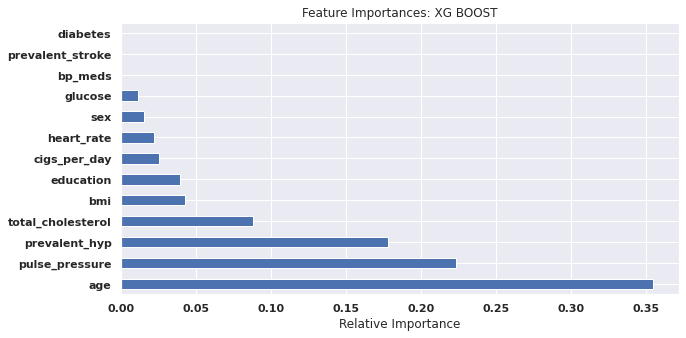

In [ ]:
# Feature importances

xgb_feat_imp = pd.Series(xgb_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,5))
plt.title('Feature Importances: XG BOOST')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

In [ ]:
print(classification_report(y_test,xgb_test_pred,target_names=['Negative','Positive']))

              precision    recall  f1-score   support

    Negative       0.91      0.70      0.79       864
    Positive       0.26      0.60      0.37       153

    accuracy                           0.69      1017
   macro avg       0.59      0.65      0.58      1017
weighted avg       0.81      0.69      0.73      1017



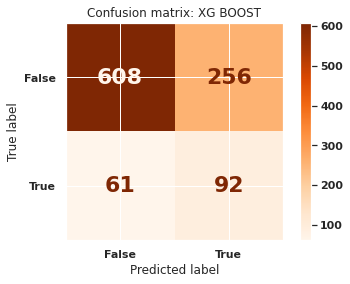

In [ ]:
# Confusion matrix
xgb_confusion_matrix = cm(y_test, xgb_test_pred)
cm_display = cmd(confusion_matrix = xgb_confusion_matrix, display_labels = [False, True])

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rc('font', **font)

cm_display.plot(cmap='Oranges')
plt.title('Confusion matrix: XG BOOST')
plt.show()

# **Modeling summary:**

* We trained 7 unique Machine Learning models using the training dataset, and hyperparameter tuning was used in some models to improve the model performance.
* To build the models, missing values were handled, feature engineering and feature selection was performed, and the training dataset was oversampled using SMOTE to reduce bias on one outcome.
* Recall was chosen as the model evaluation metric because it was very important that we reduce the false negatives.
* Initial set of predictions were obtained using the baseline model, ie, logistic regression model, and other commonly used classification models were also build in search of better predictions.

The Recall values for the models are as follows:


In [ ]:
# Recall results
print('Logistic Regression train Recall       :',lr_train_recall)
print('Logistic Regression test Recall        :',lr_test_recall)
print('--x--')
print('K Nearest Neighbors train Recall       :',knn_train_recall)
print('K Nearest Neighbors test Recall        :',knn_test_recall)
print('--x--')
print('Naive Bayes train Recall               :',nb_train_recall)
print('Naive Bayes test Recall                :',nb_test_recall)
print('--x--')
print('Decision Tree train Recall             :',dt_train_recall)
print('Decision Tree test Recall              :',dt_test_recall)
print('--x--')
print('Support Vector Machine train Recall    :',svm_train_recall)
print('Support Vector Machine test Recall     :',svm_test_recall)
print('--x--')
print('Random Forests train Recall            :',rf_train_recall)
print('Random Forests test Recall             :',rf_test_recall)
print('--x--')
print('XG Boost train Recall                  :',xgb_train_recall)
print('XG Boost test Recall                   :',xgb_test_recall)
print('--x--')

Logistic Regression train Recall       : 0.6923076923076923
Logistic Regression test Recall        : 0.6601307189542484
--x--
K Nearest Neighbors train Recall       : 0.8312655086848635
K Nearest Neighbors test Recall        : 0.6993464052287581
--x--
Naive Bayes train Recall               : 0.5330024813895782
Naive Bayes test Recall                : 0.5098039215686274
--x--
Decision Tree train Recall             : 0.8600496277915632
Decision Tree test Recall              : 0.7712418300653595
--x--
Support Vector Machine train Recall    : 0.7478908188585608
Support Vector Machine test Recall     : 0.6993464052287581
--x--
Random Forests train Recall            : 0.7062034739454094
Random Forests test Recall             : 0.6601307189542484
--x--
XG Boost train Recall                  : 0.7831265508684864
XG Boost test Recall                   : 0.6013071895424836
--x--


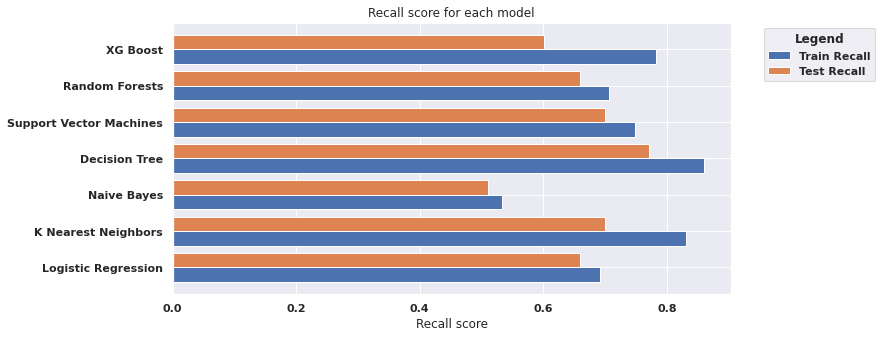

In [ ]:
# Plotting Recall scores

ML_models = ['Logistic Regression','K Nearest Neighbors','Naive Bayes','Decision Tree','Support Vector Machines','Random Forests','XG Boost']
train_recalls = [lr_train_recall,knn_train_recall,nb_train_recall,dt_train_recall,svm_train_recall,rf_train_recall,xgb_train_recall]
test_recalls = [lr_test_recall,knn_test_recall,nb_test_recall,dt_test_recall,svm_test_recall,rf_test_recall,xgb_test_recall]
  
X_axis = np.arange(len(ML_models))

plt.figure(figsize=(10,5))
plt.barh(X_axis - 0.2, train_recalls, 0.4, label = 'Train Recall')
plt.barh(X_axis + 0.2, test_recalls, 0.4, label = 'Test Recall')
  
plt.yticks(X_axis,ML_models)
plt.xlabel("Recall score")
plt.title("Recall score for each model")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.show()

The decision tree has the lowest test recall.

* Predicting the risk of coronary heart disease is critical for reducing fatalities caused by this illness. We can avert deaths by taking the required medications and precautions if we can foresee the danger of this sickness ahead of time.
* It is critical that the model we develop has a high recall score. It is OK if the model incorrectly identifies a healthy patient as a high risk patient because it will not result in death, but if a high risk patient is incorrectly labelled as healthy, it may result in fatality.
* We were able to create a model with a recall of just 0.77 because of limitations in computational power availability. This indicates that out of 100 individuals with the illness, our model will be able to classify only 77 as high risk patients, while the remaining 33 will be misclassified.
* Future developments must include a strategy to improve the model recall score, enabling us to save even more lives from this disease.

# **Conclusion:**

During the course of this project, we:
* Defined the problem statement
* Loaded the data into Colab IDE
* Cleaned the data, handled missing data, and performed feature engineering and feature selection
* Performed exploratory data analysis (EDA)
* Built 7 classification models to predict the risk of coronary heart diseases
* Evaluated the models using Recall to compare them
* Conclusion

# **References:**

* GeekforGeeks 
* Towards data science
* Analytics Vidhya
* ProjectPro
* Kaggle
* W3 school
* Pythonguides
* Stackoverflow
* Python libraries technical documentation
* Krish Naik on Youtube
* Codebasics on Youtube
* 3blue1brown on Youtube